In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("../data/raw/ga_webpages_geo.csv", sep=";",index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902722 entries, 0 to 2721
Data columns (total 8 columns):
date               902722 non-null int64
pagePath           902722 non-null object
city               902722 non-null object
longitude          902722 non-null float64
latitude           902722 non-null float64
pageviews          902722 non-null int64
uniquePageviews    902722 non-null int64
exits              902722 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 62.0+ MB


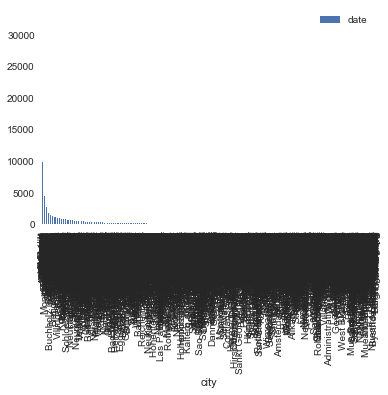

In [4]:
df[["city", "date"]].groupby("city").aggregate('count').sort_values(by="date", ascending=False).plot.bar()

In [54]:
import urllib.request
import re
# from lxml.html.clean import Cleaner

In [55]:
page = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_cities_in_Germany_by_population")
page = page.read().decode("utf-8")
page = re.sub(r'<span[^<]*<\/span>', '', page)
# cols = ["Rank", "City", "Population_2015", "Area", "Density", "Land"]
# tags = ['h1','h2','h3','h4','h5','h6',
#        'div', 'span', 
#        'img', 'area', 'map']
# args = {'meta':False, 'safe_attrs_only':False, 'page_structure':False, 
#        'scripts':True, 'style':True, 'links':True, 'remove_tags':tags}
# cleaner = Cleaner(**args)
# cleaner.clean_html(page.decode('utf-8')).text_content()

In [58]:
wiki_tables = pd.read_html(page, header=0)

In [59]:
cities = wiki_tables[1]

In [68]:
cities.tail()

,Rank,City,Pop. 2015[1],Area [km2] [],Density per km2,State (Bundesland)
46,47,Oldenburg,163830,102.98,1575,Lower Saxony
47,48,Leverkusen,163487,78.87,2038,North Rhine-Westphalia
48,49,Osnabrück,162403,119.80,1370,Lower Saxony
49,50,Solingen,158726,89.54,1786,North Rhine-Westphalia
50,Rank,City,Pop. 2015,Area [km2],Density per km2,State (Bundesland)


In [69]:
cities = cities[:-1]
cities.tail()

,Rank,City,Pop. 2015[1],Area [km2] [],Density per km2,State (Bundesland)
45,46,Ludwigshafen am Rhein,164718,77.55,2117,Rhineland-Palatinate
46,47,Oldenburg,163830,102.98,1575,Lower Saxony
47,48,Leverkusen,163487,78.87,2038,North Rhine-Westphalia
48,49,Osnabrück,162403,119.80,1370,Lower Saxony
49,50,Solingen,158726,89.54,1786,North Rhine-Westphalia


In [71]:
cities["Pop2015"] = cities["Pop. 2015[1]"].astype('int')
del cities["Pop. 2015[1]"]

/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [76]:
cities.Rank = cities.Rank.astype('int')
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Rank                  50 non-null int64
City                  50 non-null object
Area [km2] []         50 non-null object
Density per km2       50 non-null object
State (Bundesland)    50 non-null object
Pop2015               50 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.4+ KB


/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [77]:
cities.columns = ["Rank", "City", "Area", "Density", "Bundesland", "Pop2015"]

In [78]:
cities.Area = cities.Area.astype('float')
cities.Density = cities.Density.astype('int')
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Rank          50 non-null int64
City          50 non-null object
Area          50 non-null float64
Density       50 non-null int64
Bundesland    50 non-null object
Pop2015       50 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.4+ KB


/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Get table for definition of urban/rural

In [122]:
url = "https://en.wikipedia.org/wiki/List_of_districts_of_Germany"
page = urllib.request.urlopen(url)
page = page.read().decode("utf-8")
page = re.sub(r'<span[^<]*<\/span>', '', page)
# page = re.sub(r'\[[^\]*\]', '', page)

In [123]:
wiki_tables = pd.read_html(page, header=0)

In [124]:
rural_table = wiki_tables[0]

In [125]:
rural_table["Type"] = rural_table["Type (rural/urban)"]
del rural_table["Type (rural/urban)"]

In [148]:
rural_table.replace("\[.\]", '', regex=True, inplace=True)

In [149]:
rural_table.tail()

,District,Land,Capital,Type
400,Würzburg,Bavaria,Würzburg,rural
401,Würzburg,Bavaria,NaN,urban
402,Zollernalbkreis,Baden-Württemberg,Balingen,rural
403,Zweibrücken,Rhineland-Palatinate,NaN,urban
404,Zwickau,Saxony,Zwickau,rural


In [150]:
rural_table["Urban"] = rural_table.Type.apply(lambda x: 1 if x == 'urban' else 0)

In [151]:
rural_table.head()

,District,Land,Capital,Type,Urban
0,Aachen,North Rhine-Westphalia,Aachen,rural,0
1,Aachen,North Rhine-Westphalia,NaN,urban,1
2,Ahrweiler,Rhineland-Palatinate,Bad Neuenahr-Ahrweiler,rural,0
3,Aichach-Friedberg,Bavaria,Aichach,rural,0
4,Alb-Donau,Baden-Württemberg,Ulm,rural,0


In [154]:
rural_table.to_csv("../data/interim/rural_urban.csv", index=False)